## Setup Environment

In [47]:
!pip install ultralytics
!pip install opencv-python

In [48]:
from ultralytics import YOLO , solutions
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the YOLO Model

In [50]:
model = YOLO('/content/fine_tuned_linecne_plate.pt')

## Prepare the Video Capture

In [51]:
# Prepare the video capture
video_path = '/content/drive/MyDrive/Dataset/IMG_9462.MOV'
cap = cv2.VideoCapture(video_path)

## Get Video Information

In [52]:
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [53]:
print("Height:", height)
print("Width:", width)
print("FPS:", fps)

Height: 1584
Width: 2816
FPS: 59


In [54]:
output_path = 'output_video.avi'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [55]:
License_plate = set()

In [56]:
box = (1650, 900, 2816, 1500)

In [57]:
counter = 0



0: 384x640 1 license_plate, 285.6ms
Speed: 4.3ms preprocess, 285.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


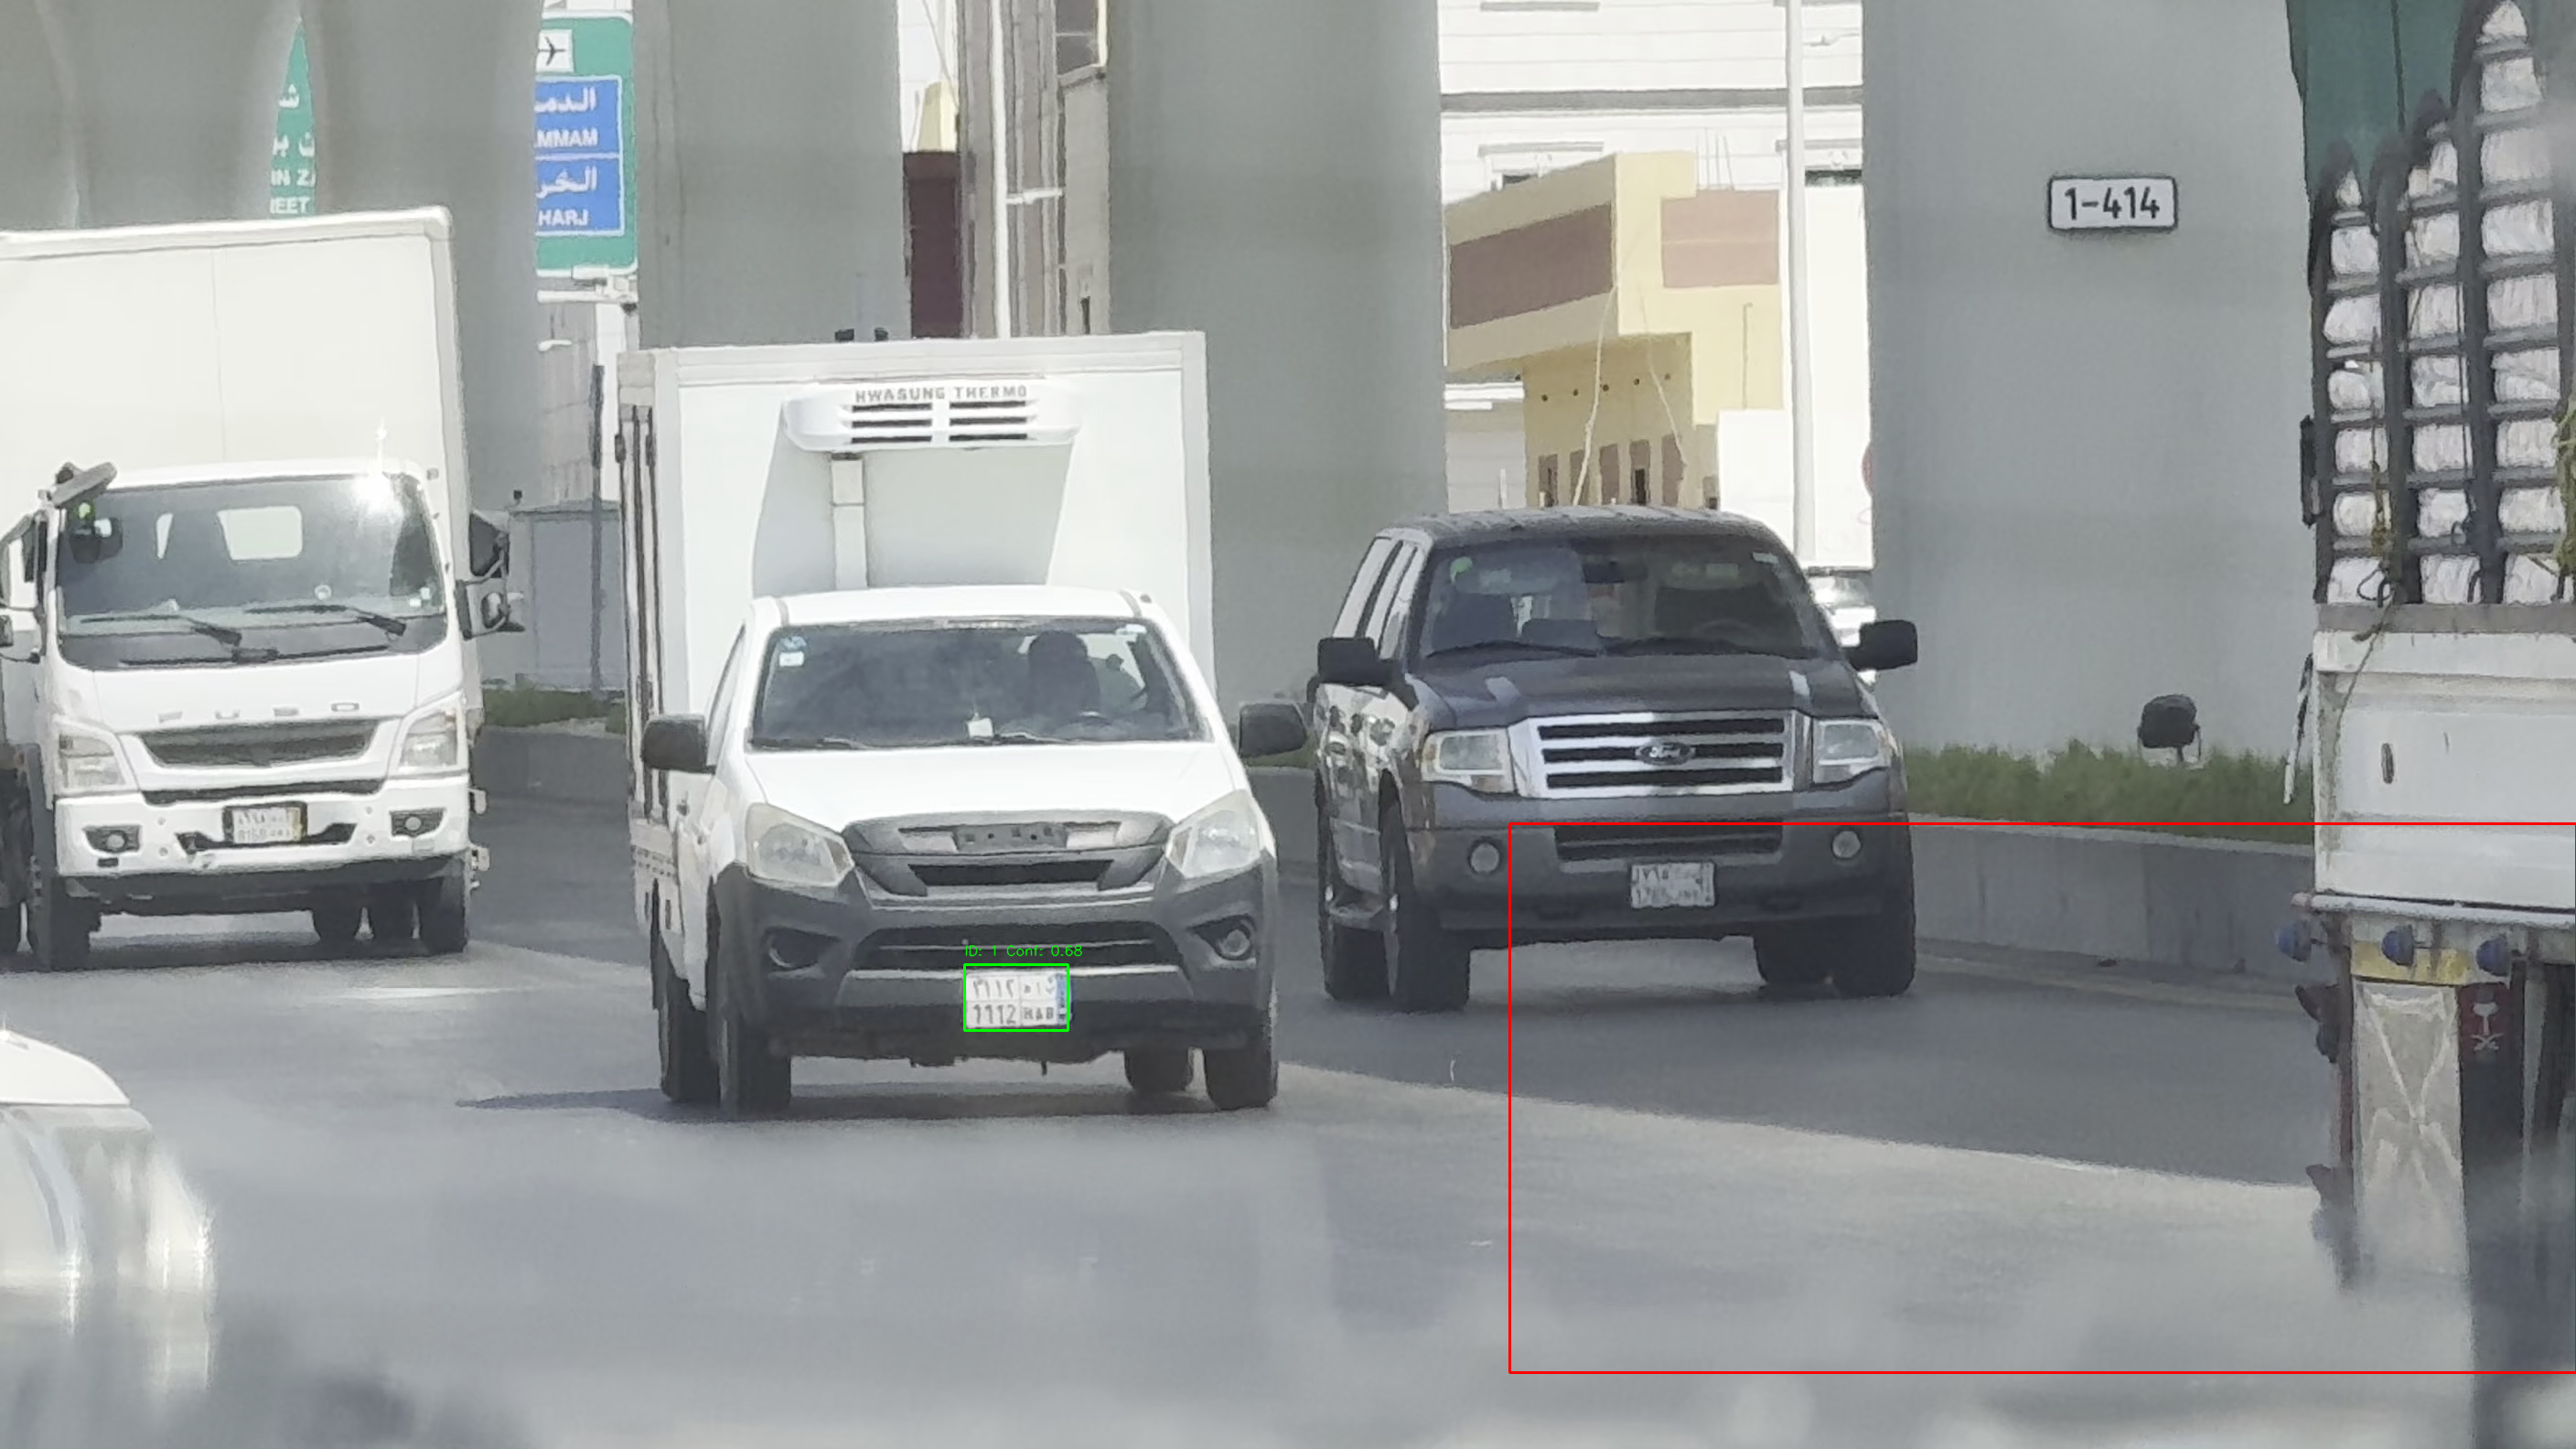

In [ ]:
# Define the region near the bottom of the frame
close_to_camera_region = (int(height * 0.8), height)  # Adjust the region as needed

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model on the frame
    results = model.track(frame, persist=True)

    for result in results:
        for boxes in result.boxes:

            # Get Object details
            bbox = boxes.xyxy[0].cpu().numpy()          # Bounding Box
            class_id = int(boxes.cls[0].cpu().numpy())  # Class ID
            conf = boxes.conf[0].cpu().numpy()          # Confidence

            # Check if boxes.id is not None before accessing it
            if boxes.id is not None:
                id = int(boxes.id[0].cpu().numpy())     # Object ID
            else:
                # Handle the case where id is None
                id = -1

            x1, y1, x2, y2 = map(int, bbox)
            cropped_object = frame[y1:y2, x1:x2]

            # Draw BBox
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f'ID: {id} Conf: {conf:.2f}'
            # Add labels for each car
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

            # # Detect car and add the id to the set
            # if id not in License_plate:
            #     License_plate.add(id)
            #     save_path = os.path.join('/content/vid 3 images', f"{counter}.jpg")  # Save with object name and index
            #     counter += 1
            #     # Save the cropped image
            #     cv2.imwrite(save_path, cropped_object)

            # Check if the object is close to the camera
            # if y2 >= close_to_camera_region[0]:
            #     if id not in License_plate:
            #       License_plate.add(id)
            #       save_path = os.path.join('/content/Images1', f"{counter}.jpg")  # Save with object name and index
            #       counter += 1
            #        # Save the cropped image
            #       cv2.imwrite(save_path, cropped_object)
            if x1 >= box[0] and y1 >= box[1] and x2 <= box[2] and y2 <= box[3]:
                if id not in License_plate:
                    License_plate.add(id)
                    save_path = os.path.join('/content/Images1', f"{counter}.jpg")  # Save with object name and index
                    counter += 1
                    # Save the cropped image
                    cv2.imwrite(save_path, cropped_object)
    cv2.rectangle(frame, box[:2], box[2:], (0, 0, 255), 2)


    video_writer.write(frame)

    # Display each frame
    # cv2_imshow(frame)


In [ ]:
cap.release()
video_writer.release()
cv2.destroyAllWindows()
